In [2]:
# For formatting of the code
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY313,
)

DEBUG:jupyter_black:Using config from C:\Users\haavarug\Documents\VSCode-PhD\chemometrics\pyproject.toml
DEBUG:jupyter_black:config: {'line_length': 79, 'lab': False, 'target_versions': {<TargetVersion.PY313: 13>}}


TypeError: Mode.__init__() got an unexpected keyword argument 'lab'

# Solution to Exercise set 1: Least squares regression

This exercise focuses on practical applications of least squares regression with Python. You will learn how to apply least squares regression to fit models of different kinds and how to evaluate the results.

**Learning Objectives:**

After completing this exercise set, you will be able to:

* Apply ordinary least squares regression to fit a linear model to data, using [NumPy](https://numpy.org/), [SciPy](https://scipy.org/), [scikit-learn](https://scikit-learn.org/), and [statsmodels](https://www.statsmodels.org/).
* Compare the quality of different regression models by inspecting their residuals.
* Estimate errors for coefficients by obtaining their confidence intervals.
* Apply weighting to data points in least squares regression.
* Use non-linear least squares regression.


**To get the exercise approved, complete the following problems:**

- [1.1(c)](#1.1(c)) and [1.1(d)](#1.1(d)): Ordinary least squares regression and comparison of quality by residuals.
- [1.2(d)](#1.2(d)) and [1.2(e)](#1.2(e)): Weighted least squares regression and how to obtain confidence intervals for regression parameters.
- [1.3(b)](#1.3(b)): Non-linear least squares regression.

## Exercise 1.1: Polynomial regression with least squares

The temperature (°C) is measured continuously over time at a high altitude
in the atmosphere using a
weather balloon. Every hour a measurement is made and sent to an onboard computer.
The measurements are 
shown in Fig. 1 and can be found in [the data file](temperature.csv) (located at 'temperature.csv').

<figure>
<img src="Fig_1_1.png" width="50%">
<figcaption><p style='text-align: center;'><b>Fig. 1:</b> Measured temperature as a function of time.</p></figcaption> 
</figure>

### 1.1(a)

To model the temperature ($y$) as a function of the time ($x$), we choose a second-order polynomial:

\begin{equation}
y = b_0 + b_1 x + b_2 x^2.
\end{equation}

Explain how you can formulate this on a form suitable for least-squares regression,
$\mathbf{y} = \mathbf{X} \mathbf{b}$. That is:

1. What do the vectors $\mathbf{y}$ and $\mathbf{b}$ contain?
2. What does the matrix $\mathbf{X}$ contain?

#### Your answer to question 1.1(a): What are $\mathbf{y}$,  $\mathbf{b}$, and $\mathbf{X}$?

First, we rewrite the given model as a linear model by introducing
the variables $x_1 = x$ and $x_2 = x^2$:

\begin{equation*}
\hat{y} = b_0 + b_1 x + b_2 x^2 = b_0 + b_1 x_1 + b_2 x_2 .
\end{equation*}

We then let $y_{i}$ be the result of
measurement no. $i$ and
$x_{ij}$ the value of variable $j$ in the same measurement. Our model for this particular
point is then:

\begin{equation*}
y_i = b_0 + b_1 x_{i1} + b_2 x_{i2} .
\end{equation*}

In matrix form (assuming we have $n$ measurements), we get,

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
= \begin{bmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots  \\
1 & x_{n1} & x_{n2} 
\end{bmatrix}
\begin{bmatrix}
b_0 \\
b_1 \\
b_2
\end{bmatrix} .
$$

We can also write the $\mathbf{X}$ matrix using the original
variables,

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1} & x_{1}^2 \\
1 & x_{2} & x_{2}^2 \\
\vdots & \vdots & \vdots \\
1 & x_{n} & x_{n}^2 
\end{bmatrix}
.
$$

Thus we have the following:

1. $\mathbf{y}$ contains the measured $y_i$ values and $\mathbf{b}$ contains the parameters $b_0$, $b_1$, $b_2$, $b_3$.
2. $\mathbf{X}$ contains the variables as columns and a column of $1$'s
  to account for the constant term.

### 1.1(b)

Fit a second-order polynomial model,

\begin{equation}
y = b_0 + b_1 x + b_2 x^2 ,
\end{equation}

to the given data by making use of [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) from [NumPy](https://numpy.org/). 

1. Obtain the parameters $b_0$, $b_1$, and $b_2$.
2. Plot your model: Create a scatter plot of the original data points. Overlay a line plot of the fitted quadratic model on the same graph.
3. Calculate the [residuals](https://en.wikipedia.org/wiki/Errors_and_residuals) and create a scatter plot of the residuals against the fitted values. 
4. Based on your results, how do you assess your model? Please see [What is Considered a Good vs. Bad Residual Plot?](https://www.statology.org/good-vs-bad-residual-plot/) for a short explanation of what to look for in the residual plot.

Below, you will find some code to get you started:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Styling for plots:
sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# For showing matplotlib in jupyter:
# (you can experiment with replacing "inline" with "notebook")
%matplotlib inline

In [4]:
# Load the raw data
data = pd.read_csv("temperature.csv")
data.head()

,hour,temperature
0,1,31.312231
1,2,25.648250
2,3,18.575565
3,4,27.077625
4,5,14.760071


To fit a polynomial to your data, you have several options. Here are three popular choices:

1. [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) from [NumPy](https://numpy.org/). This is the simplest option, suitable for most basic polynomial fitting tasks. It uses a least squares approach to fit a polynomial of a given degree to your data. 
2. [Ordinary least squares (OLS)](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) from [statsmodels](https://www.statsmodels.org): This method provides more detailed results than polyfit, including error estimates for the coefficients. It's a good choice if you need more information about the fit. 
3. [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from [scikit-learn](https://scikit-learn.org/): This is a more general approach that can be used for a variety of regression tasks, including polynomial fitting. It's particularly useful if you want to combine polynomial fitting with other methods, such as cross-validation.

For options 2 and 3, we have to "construct" the $\mathbf{X}$-matrix (see [1.1(a)](#1.1(a))), while `polyfit` will do this for us. We select the simplest option and use `polyfit` in this exercise. Here is one example for finding a first-order polynomial to get you started:

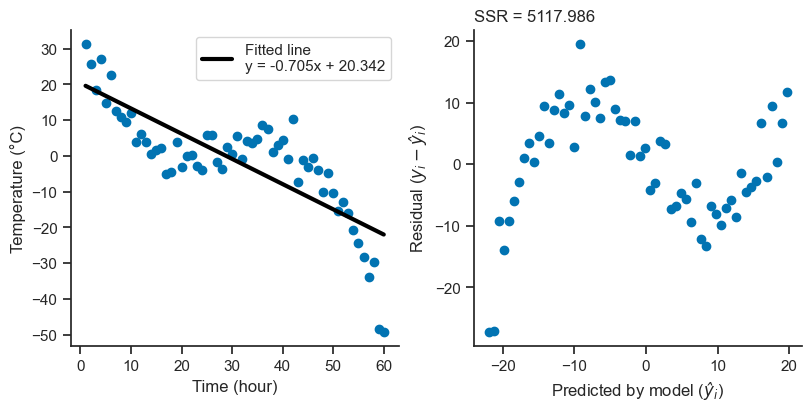

In [5]:
x = data["hour"]
y = data["temperature"]
param = np.polyfit(x, y, deg=1)  # Selects a second order polynomial

# param now contains the parameters:
equation = f"y = {param[0]:.3f}x + {param[1]:.3f}"

# To evaluate the polynomial, we use np.polyval:
y_hat = np.polyval(param, x)

# And we can find the residuals/errors
residual = y - y_hat

ssr = np.sum(residual**2)  # Sum of squared residuals

# Plot the fitted polynomial and residuals
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.scatter(data["hour"], data["temperature"])
ax1.set(xlabel="Time (hour)", ylabel="Temperature (°C)")
ax1.plot(x, y_hat, lw=3, color="black", label=f"Fitted line\n{equation}")
ax1.legend()
ax2.scatter(y_hat, residual)
ax2.set(xlabel="Predicted by model ($ŷ_i$)", ylabel="Residual ($y_i - ŷ_i$)")
ax2.set_title(f"SSR = {ssr:.3f}", loc="left")
sns.despine(fig=fig)

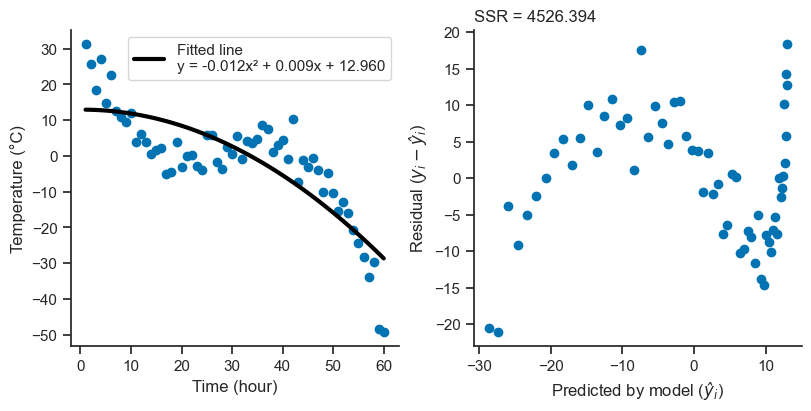

In [6]:
x = data["hour"]
y = data["temperature"]
param = np.polyfit(x, y, deg=2)  # Selects a second order polynomial

# param now contains the parameters:
equation = f"y = {param[0]:.3f}x² + {param[1]:.3f}x + {param[2]:.3f}"

# To evaluate the polynomial, we use np.polyval:
y_hat = np.polyval(param, x)

# And we can find the residuals/errors
residual = y - y_hat

ssr = np.sum(residual**2)  # Sum of squared residuals

# Plot the fitted polynomial and residuals
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.scatter(data["hour"], data["temperature"])
ax1.set(xlabel="Time (hour)", ylabel="Temperature (°C)")
ax1.plot(x, y_hat, lw=3, color="black", label=f"Fitted line\n{equation}")
ax1.legend()
ax2.scatter(y_hat, residual)
ax2.set(xlabel="Predicted by model ($ŷ_i$)", ylabel="Residual ($y_i - ŷ_i$)")
ax2.set_title(f"SSR = {ssr:.3f}", loc="left")
sns.despine(fig=fig)

In [7]:
print(param)

[-1.17103779e-02  9.09512591e-03  1.29603071e+01]


#### Your answer to question 1.1(b): What are the coefficients of the second-order polynomial and how do you assess (based on the two plots you made) your model?


<p style="text-align: center;"><b>Table A:</b> Coefficients for the quadratic polynomial</p>  

|  Coefficient | Value       |
|--------------|-------------|
| $b_0$        | 12.96       |
| $b_1$        | 0.0091      |
| $b_2$        | -0.012      |


The quadratic curve in the figure above seems to miss a lot of the points. The residuals show a trend, which indicates that the model is not fully capturing the relationship between time and temperature. While both the quadratic model and the first-order model (from the example code) predict the overall decreasing trend in temperature, the quadratic model does not appear to provide a significantly better fit than the simpler linear model.

### 1.1(c)

In this problem, you will explore how the choice of polynomial order affects the model's ability to fit the temperature data.

1. Extend your code from [1.1(b)](#1.1(b)) to fit polynomial models of orders 1 to 5 to the temperature data.
2. Plot the fitted curves for all models together with the raw data on the same graph (time vs. temperature).
3. Plot the residuals for each model in separate scatter plots.

Which polynomial order best models temperature as a function of time?

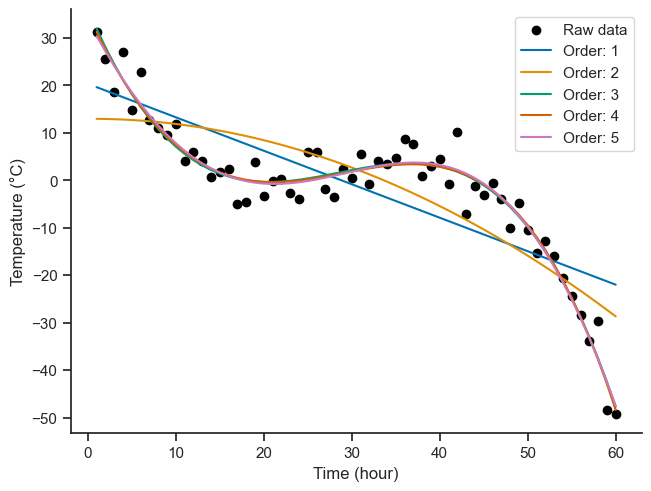

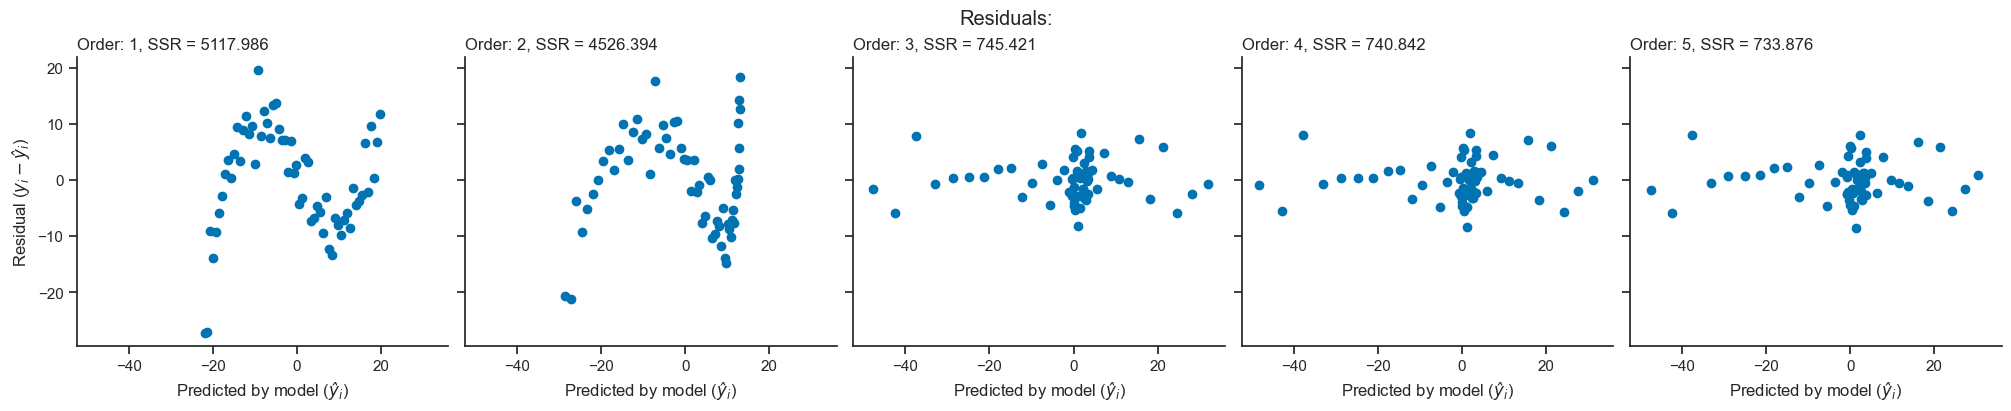

In [8]:
x = data["hour"]
y = data["temperature"]


order = [1, 2, 3, 4, 5]
models = [np.polyfit(x, y, deg=orderi) for orderi in order]

fig1, ax1 = plt.subplots(constrained_layout=True)
ax1.scatter(x, y, label="Raw data", color="black")

fig2, axes2 = plt.subplots(
    nrows=1,
    ncols=len(order),
    constrained_layout=True,
    sharex=True,
    sharey=True,
    figsize=(len(order) * 4, 4),
)
fig2.suptitle("Residuals:")


ssr_all = []
for i, orderi in enumerate(order):
    param = np.polyfit(x, y, deg=orderi)
    y_hat = np.polyval(param, x)
    residual = y - y_hat
    ssr = np.sum(residual**2)
    ssr_all.append(ssr)

    ax1.plot(x, y_hat, label=f"Order: {orderi}")
    axes2[i].scatter(y_hat, residual)
    if i == 0:
        axes2[i].set(ylabel="Residual ($y_i - ŷ_i$)")
    axes2[i].set(xlabel="Predicted by model ($ŷ_i$)")
    axes2[i].set_title(f"Order: {orderi}, SSR = {ssr:.3f}", loc="left")


# Plot the fitted polynomial and residuals
ax1.set(xlabel="Time (hour)", ylabel="Temperature (°C)")
ax1.legend()

sns.despine(fig=fig1)
sns.despine(fig=fig2)

#### Your answer to question 1.1(c): Which polynomial order best models temperature as a function of time?

The residual plots for the third, fourth, and fifth-order models show no clear patterns or trends, indicating that these models are capturing the underlying structure of the data well. However, the higher-order models might be overfitting (modelling the noise). A third-order polynomial provides a good balance between complexity and goodness of fit. It captures the main features of the data without introducing unnecessary complexity. I would, therefore, recommend using a third-order polynomial.

### 1.1(d)
Obtain the sum of squared residuals for each polynomial you made in [1.1(c)](#1.1(c)) and plot this as a function of the
polynomial degree. Use this plot to determine (from visual inspection) the best polynomial
order for modeling the temperature as a function of time. Does this agree with your
assessment from [1,1(c)](#1.1(c))?

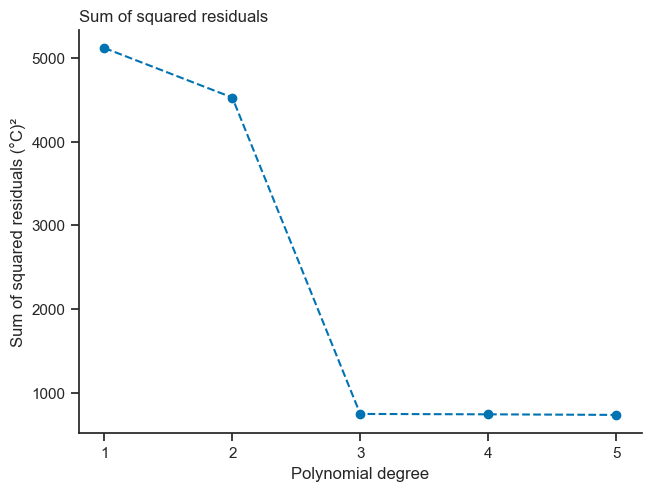

In [9]:
# Using the data stored from 1.1(c):
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(order, ssr_all, ls="--", marker="o")
ax.set_title("Sum of squared residuals", loc="left")
ax.set_xticks(order)
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("Sum of squared residuals (°C)²")
sns.despine(fig=fig)

#### Your answer to question 1.1(d): What polynomial order do you recommend?

We observe a significant drop in the sum of squared residuals when going from a second to a third-order polynomial. After that, the decrease in the sum of squared residuals becomes negligible. This suggest that further increases in complexity (for instance, going to a 4th or 5th order polynomial) does not substantially improve the fit. This is consisten with our findings in 1.1(c), where we observed that a third-order polynomial captured the main features of the data without unnecessary complexity.

## Exercise 1.2: Weighted least squares

In this exercise we will use least squares regression to investigate a real-world phenomenon: the decay of beer froth over time. This is to demonstrate the application of regression in the study of a physical phenomena to obtain a physical quantity (in this case a characteristic time for the decay). 

Arnd Leike was awarded the 2002 [Ig Nobel prize](https://en.wikipedia.org/wiki/Ig_Nobel_Prize) for this [research on the decay of beer froth](https://doi.org/10.1088/0143-0807/23/1/304), and we will here reproduce the data analysis. In particular, we will use the reported raw data and carry out a weighted least squaers regression. In addition, we will also obtain an error estimate (as a confidence interval) for the determined physical quantity.


The file [Data/erdinger.csv](Data/erdinger.csv)
contains [measured heights](https://doi.org/10.1088/0143-0807/23/1/304) for beer
froth as a function of time, along with the errors in the measured heights. 


**Please use [scikit-learn](https://scikit-learn.org/) and [startsmodels](https://www.statsmodels.org) for the fitting in this exercise!**

### 1.2(a)
Create a linear model (first-order polynomial) for the beer froth height as a function of time using least squares.
Plot your model with the raw data, calculate the [coefficient of determination ($R^2$)](https://en.wikipedia.org/wiki/Coefficient_of_determination), and plot
the residuals. Is this linear model suitable for estimating the froth height as a function of time?

**Note:** You do not need to add code for this part, but make sure that you understand what it does.

In [10]:
# Here is some code to get you started:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Styling for plots:
sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# For showing matplotlib in jupyter:
# (you can experiment with replacing "inline" with "notebook")
%matplotlib inline

data = pd.read_csv("erdinger.csv")
data.head()

,time,height,height-error
0,0,17.0,0.0
1,15,16.1,0.3
2,30,14.9,0.4
3,45,14.0,0.4
4,60,13.2,0.4


In [11]:
time = data["time"].to_numpy()
height = data["height"].to_numpy()
height_error = data["height-error"].to_numpy()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To fit a model with scikit-learn we do the following:
model1 = LinearRegression(fit_intercept=True)
X = time.reshape(-1, 1)
model1.fit(X, height)

# We can use the model for prediction by:
y_hat_1 = model1.predict(X)

# To calculate R²:
r2_model1 = model1.score(X, height)
# or:
r2_model1 = r2_score(height, y_hat_1)

# We can calculate the mean squared error (MSE) for the model:
mse_model1 = mean_squared_error(height, y_hat_1)
# Summarize the model with some short text:
model1_txt = f"y = {model1.coef_[0]:.3g}x + {model1.intercept_:.3g}"
model1_txt = f"{model1_txt}\n(R² = {r2_model1:.3g}, MSE = {mse_model1:.3g})"
print(model1_txt)

y = -0.0321x + 15.4
(R² = 0.944, MSE = 0.657)


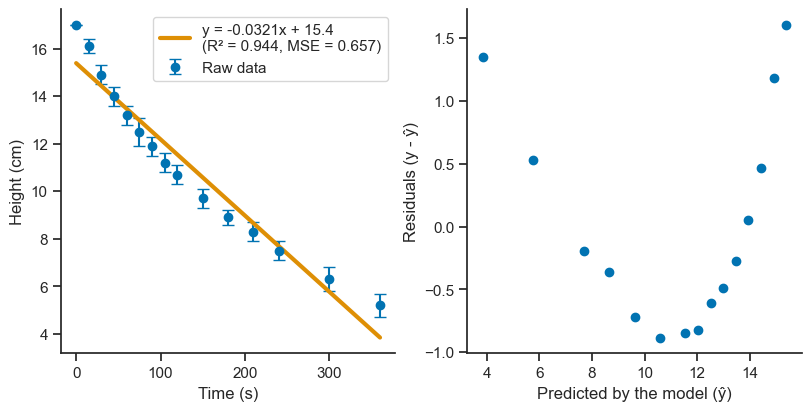

In [13]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.errorbar(
    time,
    height,
    yerr=height_error,
    label="Raw data",
    fmt="o",  # Just show the symbols and no lines
    capsize=4,  # Size of end of the error bars
)
ax1.plot(
    time,
    y_hat_1,
    lw=3,
    label=model1_txt,
)
ax1.set(xlabel="Time (s)", ylabel="Height (cm)")
ax1.legend()

ax2.scatter(y_hat_1, height - y_hat_1)
ax2.set(xlabel="Predicted by the model (ŷ)", ylabel="Residuals (y - ŷ)")
sns.despine(fig=fig)

#### Your answer to question 1.2(a): Is this linear model suitable for estimating the froth height as a function of time?

The linear model captures most of the trend in the decreasing height as a function of time and R² is quite high (0.944). However, it fails to account for the curvature in the data, especially at earlier times. The residual plot shows a clear pattern (U-shape), and the presence of a pattern in the residuals suggests that the linear model does not capture the relationship between height and froth accurately. Furthermore, the linear model predicts a negative froth height at around 480 seconds, which is physically impossible!

In [14]:
# Extrapolate to see where we get negative heights:
X2 = np.arange(400, 500, 10).reshape(-1, 1)
model1.predict(X2)

array([ 2.56379246e+00,  2.24303845e+00,  1.92228443e+00,  1.60153042e+00,
        1.28077641e+00,  9.60022396e-01,  6.39268384e-01,  3.18514371e-01,
       -2.23964166e-03, -3.22993654e-01])

### 1.2(b)
If we assume that the change in froth volume is proportional
to the volume present at any given time, we can show that this leads to
exponential decay of the froth height,

\begin{equation}
\frac{h(t)}{h(0)} = \exp \left(-\frac{t}{\tau} \right),
\end{equation}

where $h(t)$ is the height of the froth as a function of time $t$, and $\tau$ is a parameter.
We will assume that $h(0)$ is a known parameter, equal to the initial height of the froth.

Show how you can transform the equation above to a linear equation of the form,

\begin{equation}
y = b x,
\end{equation}

and express $b, x, y$ in terms of $h, h(0), t, \tau$.

#### Your answer to question 1.2(b):


If we take the natural logarithm on both sides of the equation, we get,

\begin{equation}
\ln \left( \frac{h(t)}{h(0)} \right) = -\frac{t}{\tau} = -\frac{1}{\tau} \times t .
\end{equation}

Setting,
\begin{equation}
y = \ln \left( \frac{h(t)}{h(0)} \right), \quad x = t, \quad b=-\frac{1}{\tau},
\end{equation}
 we get,
\begin{equation}
\underbrace{\ln \left( \frac{h(t)}{h(0)} \right)}_{y} = -\frac{t}{\tau} = \underbrace{-\frac{1}{\tau}}_{b} \times \underbrace{t}_{x},
\end{equation}

or $y = bx$.

### 1.2(c)
Use the linear transformation you found in [1.2(b)](#1.2(b)) to create a new linear model where you estimate
the value of $\tau$. Plot your new model together with the raw data and calculate $R^2$.

**Hint:** The equation, $y=bx$, above does not include the usual constant term.
This will modify the least squares equation as shown in [Appendix A](#A.-Least-squares-without-the-intercept).
To do the fitting without the intercept, set `fit_intercept=False` when creating the linear regression model:
```python
model2 = LinearRegression(fit_intercept=False)  # New model, without intercept
```

In [15]:
# First, transform y:
y = np.log(height / height[0])
X = time.reshape(-1, 1)

# Create the new model, without intercept:
model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

# Calculate R²:
r2_model2 = model2.score(X, y)

# Convert predicted y back to heights:
y_hat_2 = model2.predict(X)
height_hat_2 = height[0] * np.exp(y_hat_2)

# Calculate the mean squared error, based on the heights
# (this is to compare with model 1)
mse_model2 = mean_squared_error(height, height_hat_2)

tau = -1.0 / model2.coef_[0]
print(f"τ = {tau:.4g} s")

model2_txt = f"h(t) = h(0) exp(-t/{tau:4g})"
model2_txt = f"{model2_txt}\n(R² = {r2_model2:.3g}, MSE = {mse_model2:.3g})"

τ = 290.1 s


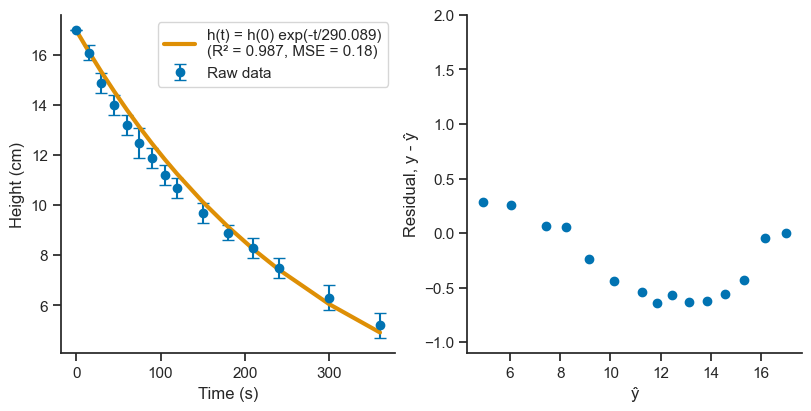

In [16]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.errorbar(
    time,
    height,
    yerr=height_error,
    label="Raw data",
    fmt="o",  # Just show the symbols and no lines
    capsize=4,  # Size of end of the error bars
)
ax1.plot(
    time,
    height_hat_2,
    lw=3,
    label=model2_txt,
)
ax1.set(xlabel="Time (s)", ylabel="Height (cm)")
ax1.legend()

# Let us plot these for heights so we can compare with model 1
ax2.scatter(height_hat_2, height - height_hat_2)
ax2.set(xlabel="ŷ", ylabel="Residual, y - ŷ")
ax2.set_ylim(-1.1, 2.0)

sns.despine(fig=fig)

#### Your answer to question 1.2(c): What value did you get for $\tau$?

From the coefficient found in the least squares fit: $\tau \approx 290$. We see that the residuals are now all
smaller in magnitude, but we are overestimating the height for a lot of the points. The residuals still show a slight curvature, suggesting that the exponential model might not be perfectly capturing the decay of the froth height.

The R² value is now very close to 1, indicating that the exponential model explains a large proportion of the variance in the transformed data.

### 1.2(d)
[Leike](https://doi.org/10.1088/0143-0807/23/1/304) found a
value of $\tau = 276 \pm 14$s which is probably lower than the
value you found in [1.2(c)](#1.2(c)).
We will now attempt to reproduce the results of Leike by using weighted least squares regression. The motivation for using weighted least squares regression is that the errors given in the raw data are not contant. To account for this, we can use wighted least squares regression which gives more weight to data points with smaller errors.

To assign the weights ($w_i$) we can use $w_i = 1/\sigma_i^2$ where $\sigma_i$ is the
reported error for observation $i$. But we need to consider the fact that we
are now fitting log-transformed values to $y = \log (h(t) / h(0))$, and this will modify the errors.
If you are familiar with [propagation of errors](https://en.wikipedia.org/wiki/Propagation_of_uncertainty),
you should be able to show that the error in $y$ ($\sigma_y$) is given by,

\begin{equation}
\sigma_y^2 = \frac{\sigma_h^2}{h^2} ,
\end{equation}

which says that we can get the error in $y$ by dividing the measured error by the measured height.

Do the following steps to perform the weighted
least squares:

1. Calculate errors for your $y$ values according to $\sigma_y^2 = \sigma_{h}^2 / h^2$.

2. Calculate weights for your $y$ values as $1/\sigma_y^2$. Note: If
  a $\sigma_y$ value is zero, set the corresponding weight to zero.
  
3. Perform a weighted least squares fitting using the calculated weights. Estimate $\tau$, plot your new model and calculate $R^2$.

In [17]:
# Example on how to run weighted least squares:
model = LinearRegression(fit_intercept=False)
# Just create some weights (not correct for 1.2(d))
weights = 1.0 / data["height-error"].to_numpy() ** 2
weights[weights == float("inf")] = 0  # Set infinite values to zero
model.fit(X, height, sample_weight=weights)  # Do fitting, but use the weights
r2 = model.score(
    X, height, sample_weight=weights
)  # Calculate R² (considering the weights).

C:\Users\haavarug\AppData\Local\Temp\ipykernel_26316\838225490.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1.0 / data["height-error"].to_numpy() ** 2


In [18]:
model3 = LinearRegression(fit_intercept=False)


# 1. Calculate errors for y:
sigma_y_sq = height_error**2 / height**2
# 2. Calculate weights for y:
weights = 1.0 / sigma_y_sq
weights[weights == float("inf")] = 0  # Set infinite values to zero

# 3. Do weighted least squares:
model3.fit(X, y, sample_weight=weights)
# Calculate R² (considering the weights).
r2_model3 = model3.score(X, y, sample_weight=weights)
y_hat_3 = model3.predict(X)
# Recalculate the heights:
height_hat_3 = height[0] * np.exp(y_hat_3)

# Calculate MSE, based on heights. For this, we need the weights for the
# heights:
weights_h = 1.0 / height_error**2
weights_h[weights_h == float("inf")] = 0
weights_h /= sum(weights_h)
# Normalize the weights (since scikit-learn is using normalized weights)

mse_model3 = mean_squared_error(height, height_hat_3, sample_weight=weights_h)

C:\Users\haavarug\AppData\Local\Temp\ipykernel_26316\1166595686.py:7: RuntimeWarning: divide by zero encountered in divide
  weights = 1.0 / sigma_y_sq
C:\Users\haavarug\AppData\Local\Temp\ipykernel_26316\1166595686.py:20: RuntimeWarning: divide by zero encountered in divide
  weights_h = 1.0 / height_error**2


In [19]:
tau_ = -1.0 / model3.coef_[0]
print(f"τ = {tau_:.4g} s")

model3_txt = f"h(t) = h(0) exp(-t/{tau_:4g})"
model3_txt = f"{model3_txt}\n(R² = {r2_model3:.3g}, MSE = {mse_model3:.3g})"
print(model3_txt)

τ = 277.4 s
h(t) = h(0) exp(-t/277.377)
(R² = 0.985, MSE = 0.125)


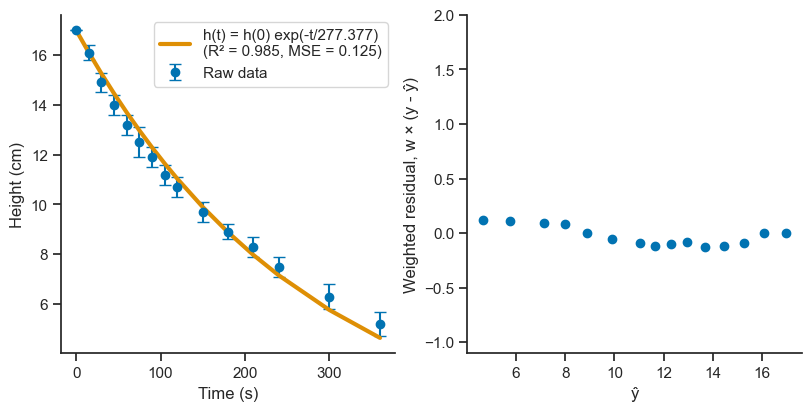

In [20]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.errorbar(
    time,
    height,
    yerr=height_error,
    label="Raw data",
    fmt="o",  # Just show the symbols and no lines
    capsize=4,  # Size of end of the error bars
)
ax1.plot(
    time,
    height_hat_3,
    lw=3,
    label=model3_txt,
)
ax1.set(xlabel="Time (s)", ylabel="Height (cm)")
ax1.legend()

# Let us plot these for heights so we can compare with model 1
ax2.scatter(height_hat_3, (height - height_hat_3) * np.sqrt(weights_h))
ax2.set(xlabel="ŷ", ylabel="Weighted residual, w × (y - ŷ)")
ax2.set_ylim(-1.1, 2.0)

sns.despine(fig=fig)

#### Your answer to question 1.2(d): What value did you get for $\tau$? How does it compare to Leike's result?

With the weighted approach, we get $\tau = 277$ s, which is very close to the $276$ s reported by Leike.
The weighted residuals are smaller in magnitude, but there might still be a weak trend. The high R² value indicates that the model captures the general trend well.

We will next quantify the uncertainty in our estimate of $\tau$.

### 1.2(e)
We can use the measured errors to estimate the error in the $\tau$ parameter. Adopt the example code below, using [statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/wls.html) to compute a 95% confidence interval for $\tau$.

In [21]:
# Here is some example code to help you get started with statsmodels:
import statsmodels.api as sm

X = time.reshape(-1, 1)
# 1. Calculate errors for y:
sigma_y_sq = height_error**2 / height**2
# 2. Calculate weights for y:
weights = 1.0 / sigma_y_sq
weights[weights == float("inf")] = 0  # Set infinite values to zero

model_wls = sm.WLS(y, X, weights=weights)
results_wls = model_wls.fit()
print(results_wls.summary(alpha=0.05))
# (Setting alpha=0.05 will calculate a 100(1-alpha)% confidence interval)

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            WLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2374.
Date:                Wed, 07 May 2025   Prob (F-statistic):                    5.00e-17
Time:                        09:15:08   Log-Likelihood:                            -inf
No. Observations:                  15   AIC:                                        inf
Df Residuals:                      14   BIC:                                        inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\haavarug\AppData\Local\Temp\ipykernel_26316\3511515454.py:8: RuntimeWarning: divide by zero encountered in divide
  weights = 1.0 / sigma_y_sq
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


**Note:** A description of the summary from statsmodels can be found in [Appendix B](#B.-The-summary-results-from-statsmodels). We only need this part:

```code
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0452      0.015      2.997      0.010       0.013       0.077
==============================================================================
```

where `coef` gives the fitted coefficient and the numbers below `[0.025      0.975]` is the confidence interval.

In [22]:
tau_statsmodels = -1.0 / results_wls.params[0]
tau_ci = results_wls.conf_int()[0]
lower_limit = min(-1.0 / tau_ci)
upper_limit = max(-1.0 / tau_ci)
print(f"τ = {tau_statsmodels:.4g} s")
print(f"Confidence interval: {lower_limit:.4g} to {upper_limit:.4g}")

τ = 277.4 s
Confidence interval: 265.7 to 290.1


In [23]:
# To get this as a ±
uncertainty1 = upper_limit - tau_statsmodels
uncertainty2 = tau_statsmodels - lower_limit
uncertainty = max(uncertainty1, uncertainty2)
print(f"τ = {round(tau_statsmodels, 0):.4g} ± {round(uncertainty, 0):.4g} s")

τ = 277 ± 13 s


#### Your answer to question 1.2(e): What confidence interval did you get for $\tau$?

The confidence interval was 265.7 to 290.1 s. The uncertainty is 13 s, so τ = 277 ± 13 s. 
This compares well with the results of Leike: τ = 276 ± 14 s at 95% confidence.

## Exercise 1.3: Non-linear least squares

In spectroscopy, it is often necessary to "deconvolve" a spectrum into a number of overlapping spectral peaks. The individual peaks can often be approximated as Gaussian functions of amplitude $\beta$, peak wavelength $\lambda$   and standard deviation $\sigma$. Hence, the spectrum $S(\lambda)$ may be written as, 

\begin{equation}
S(\lambda) = \sum_{i=1}^N \beta_i \text{e}^{-(\lambda - \lambda_i)^2 / 2\sigma_i^2},
\end{equation}

where $N$ is the number of overlapping peaks.


<p style="text-align: center;"><b>Table 1:</b> Parameters for spectral peaks</p>  

|             | Peak 1   | Peak 2   | Peak 3   |
|-------------|----------|----------|----------|
| $\beta_i$   | 0.2      | 0.4      | 0.3      |
| $\lambda_i$ | 4.0      | 5.5      | 7.2      |
| $\sigma_i$  | 0.5      | 0.8      | 0.9      |


We will in this exercise use non-linear least squares to determine the parameters in Table 1 for a noisy spectrum.
We will use [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from [SciPy](https://scipy.org/) to do this. You can also use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) from [SciPy](https://scipy.org/) for non-linear least squares: this is simpler and requires less setup, but you have less control over the optimization process.

### 1.3(a)

1. Use the parameter values in Table 1 to create a noise-free absorption spectrum $A_0 (\lambda)$ and plot it as a function of $\lambda$.
2. Simulate a noisy spectrum $A(\lambda)$ by adding Gaussian noise of amplitude (standard deviation) $\gamma=0.05$ to $A_0(\lambda)$. Plot this spectrum as well.

**Hint:** You can use [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate Gaussian noise. For example (to generate with a standard deviation of 0.01 with the same shape as a given matrix `mat`):
```python
np.random.normal(loc=0, scale=0.01, size=mat.shape)
```

In [24]:
# Here is some code to get you started:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import minimize

# Styling for plots:
sns.set_theme(style="ticks", context="notebook", palette="colorblind")

# For showing matplotlib in jupyter:
# (you can experiment with replacing "inline" with "notebook")
%matplotlib inline

In [25]:
# Since we will be using random number, we set the
# seed to get reproducible numbers:
np.random.seed(4175)

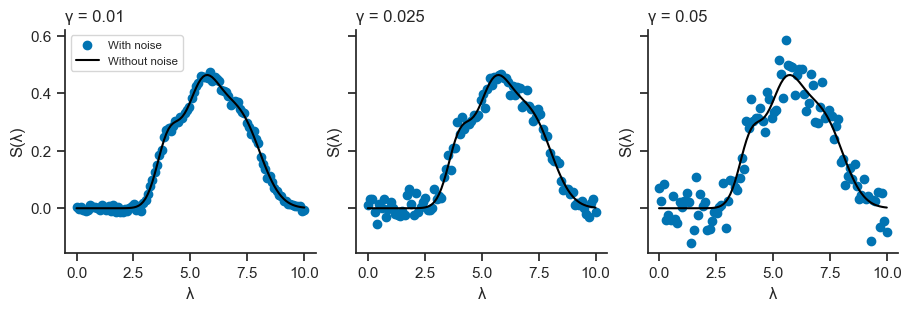

In [26]:
# 1. Calculating A0
betas = [0.2, 0.4, 0.3]
lambdas = [4.0, 5.5, 7.2]
sigmas = [0.5, 0.8, 0.9]


def gaussian(x, beta_i, lambda_i, sigma_i):
    """Helper method to calculate a gaussian."""
    return beta_i * np.exp(-((x - lambda_i) ** 2) / (2.0 * sigma_i**2))


x = np.linspace(0, 10, 100)
spectrum_without_noise = np.zeros_like(x)

for beta_i, lambda_i, sigma_i in zip(betas, lambdas, sigmas):
    spectrum_without_noise += gaussian(x, beta_i, lambda_i, sigma_i)

# 2. Adding noise:
# Let us make some variants with different noise levels:
gammas = [0.01, 0.025, 0.05]
spectrum_with_noise = []
for gamma in gammas:
    noise = np.random.normal(
        loc=0, scale=gamma, size=spectrum_without_noise.shape
    )
    spectrum_with_noise.append(spectrum_without_noise + noise)

fig, axes = plt.subplots(
    constrained_layout=True, ncols=3, figsize=(9, 3), sharex=True, sharey=True
)
for gamma, ax, spectrum in zip(gammas, axes, spectrum_with_noise):
    ax.scatter(x, spectrum, label="With noise")
    ax.plot(
        x,
        spectrum_without_noise,
        color="black",
        label="Without noise",
    )
    ax.set(xlabel="λ", ylabel="S(λ)")
    ax.set_title(f"γ = {gamma}", loc="left")
axes[0].legend(fontsize="x-small", loc="upper left")
sns.despine(fig=fig)

### 1.3(b)

Use non-linear least squares to estimate the Gaussian parameters for the noisy spectrum $A(\lambda)$ you generated in [1.3(a)](#1.3(a)). Investigate how the solution depends on your initial guess and the noise-level $\gamma$.

**Hint:** The code below outlines how to set up and perform non-linear least squares.

In [27]:
# First we define the model we will fit:
def model(x, params):
    """Calculate y using the given parameters.

    Args:
        x: The independent variable.
        params: A list of parameters:

    Returns:
        The value of the function at x.
    """
    betas = params[0::3]
    lambdas = params[1::3]
    sigmas = params[2::3]
    signal = np.zeros_like(x)

    for beta_i, lambda_i, sigma_i in zip(betas, lambdas, sigmas):
        signal += gaussian(x, beta_i, lambda_i, sigma_i)
    return signal

In [28]:
# Next, we define the objective function we will minimize:
def objective(params, x, y):
    y_fit = model(x, params)
    return np.sum((y - y_fit) ** 2)  # Return sum of squared errors

In [29]:
# First experiment, we keep the initial guess the
# same for all noise levels:

# Initial guess for the parameters:
initial_guess = [
    # Peak 1:
    0.3,
    4.0,
    1.0,
    # Peak 2
    0.3,
    6.0,
    1.0,
    # Peak 3
    0.3,
    8.0,
    1.0,
]

# Set up boundaries for the coefficients, these
# are on form (min, max) for each parameter
bounds = [
    (0.01, 2.0),
    (0.0, 10.0),
    (0.01, 2.0),
    (0.01, 2.0),
    (0.0, 10.0),
    (0.01, 2.0),
    (0.01, 2.0),
    (0.0, 10.0),
    (0.01, 2.0),
]

results = []
for spectrum in spectrum_with_noise:
    result = minimize(
        objective,
        initial_guess,
        args=(x, spectrum),
        bounds=bounds,
        options={
            "disp": False,
            "maxiter": 5000,
        },  # Print information, and do maximum 5000 iterations
    )
    results.append(result)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

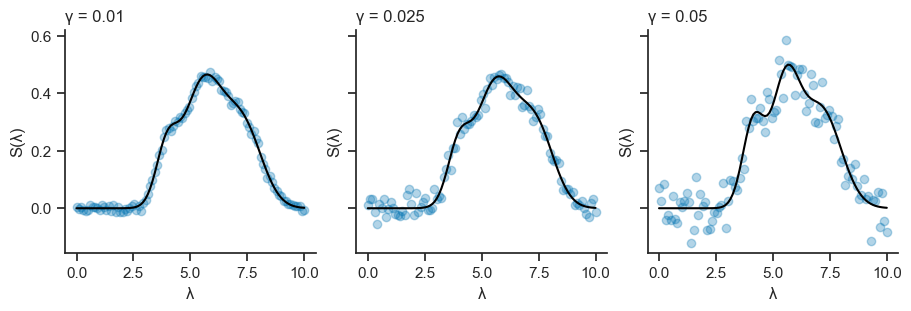

In [31]:
# Plot the results:
fig, axes = plt.subplots(
    constrained_layout=True, ncols=3, figsize=(9, 3), sharex=True, sharey=True
)

for result, gamma, spectrum, ax in zip(
    results, gammas, spectrum_with_noise, axes
):
    fit_params = result.x
    # Recalculate using the fitted parameters:
    y_fit = model(x, fit_params)
    ax.scatter(x, spectrum, label="Spectrum with noise", alpha=0.3)
    # ax.plot(x, A_zero, label="True spectrum without noise", lw=5, alpha=0.4)
    ax.plot(x, y_fit, label="Fitted model", color="black")
    ax.set(xlabel="λ", ylabel="S(λ)")
    ax.set_title(f"γ = {gamma}", loc="left")
sns.despine(fig=fig)

To assess accuracy, we compare the fitted models to the noise-free spectrum. We plot the fitted absorption values against the true values. Ideally, the points would fall on the line $y=x$, indicating a perfect fit. Deviations from this line reveal discrepancies between the model and the true spectrum.

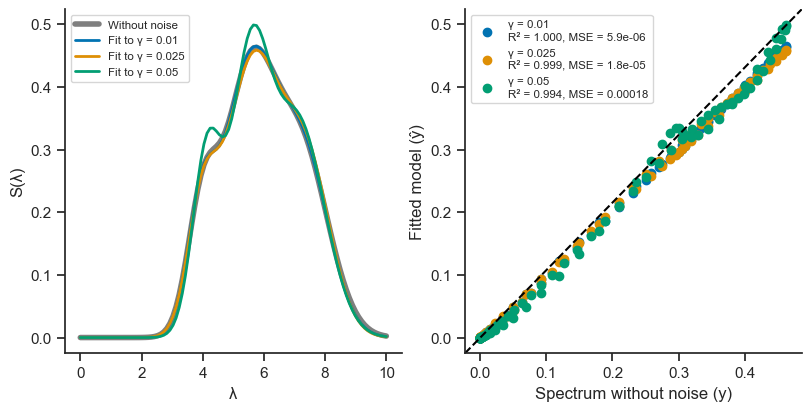

In [32]:
fig, axes = plt.subplots(constrained_layout=True, ncols=2, figsize=(8, 4))

axes[0].plot(
    x,
    spectrum_without_noise,
    label="Without noise",
    color="black",
    lw=4,
    alpha=0.5,
)

for result, gamma, spectrum in zip(results, gammas, spectrum_with_noise):
    fit_params = result.x
    y_fit = model(x, fit_params)
    axes[0].plot(x, y_fit, label=f"Fit to γ = {gamma}", lw=2)
    r2 = r2_score(spectrum_without_noise, y_fit)
    mse = mean_squared_error(spectrum_without_noise, y_fit)
    axes[1].scatter(
        spectrum_without_noise,
        y_fit,
        label=f"γ = {gamma}\nR² = {r2:.3f}, MSE = {mse:.2g}",
    )
axes[0].legend(fontsize="x-small")
axes[0].set(xlabel="λ", ylabel="S(λ)")

axes[1].legend(fontsize="x-small")
# To help read the plot, we add the y=x line:
xlim = axes[1].get_xlim()
ylim = axes[1].get_ylim()
axes[1].plot(xlim, ylim, color="black", ls="--")
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set(xlabel="Spectrum without noise (y)", ylabel="Fitted model (ŷ)")
sns.despine(fig=fig)

In [33]:
from IPython.display import display_html


# Make a function to create a table for the fitted parameters:
def make_table(result):
    table_data = {
        "Peak 1": [round(i, ndigits=3) for i in result.x[:3]],
        "Peak 2": [round(i, ndigits=3) for i in result.x[3:6]],
        "Peak 3": [round(i, ndigits=3) for i in result.x[6:]],
    }
    tablei = pd.DataFrame(
        table_data, index=[r"$\beta_i$", r"$\lambda_i$", r"$\sigma_i$"]
    )
    return tablei


# Print out the parameters:
for result in results:
    tablei = make_table(result)
    display_html(tablei)

,Peak 1,Peak 2,Peak 3
$\beta_i$,0.186,0.431,0.273
$\lambda_i$,3.959,5.558,7.327
$\sigma_i$,0.472,0.871,0.825


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.185,0.433,0.269
$\lambda_i$,3.979,5.612,7.393
$\sigma_i$,0.486,0.888,0.787


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.294,0.415,0.344
$\lambda_i$,4.145,5.542,7.103
$\sigma_i$,0.479,0.614,0.879


From the results above, we see that the non-linear least squares method finds a good overall fit to the noisy spectrum, as indicated by the high R² values and low mean squared errors in all cases. However, increasing the noise level leads to overfitting (we start to model more of the noise) and deviations from the true spectral shape. This is examplified by the peak visible (around $\lambda = 4$) in the fitted model for the highest noise level.

,Peak 1,Peak 2,Peak 3
$\beta_i$,0.294,0.415,0.344
$\lambda_i$,4.145,5.542,7.103
$\sigma_i$,0.479,0.614,0.879


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.476,0.154,0.054
$\lambda_i$,6.017,4.060,1.200
$\sigma_i$,1.416,0.250,0.065


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.294,0.415,0.344
$\lambda_i$,4.145,5.542,7.103
$\sigma_i$,0.479,0.614,0.879


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.024,0.024,0.024
$\lambda_i$,0.000,0.000,0.000
$\sigma_i$,0.010,0.010,0.010


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.172,0.010,0.477
$\lambda_i$,0.041,2.775,5.895
$\sigma_i$,0.031,0.010,1.506


,Peak 1,Peak 2,Peak 3
$\beta_i$,0.344,0.415,0.294
$\lambda_i$,7.103,5.542,4.145
$\sigma_i$,0.879,0.614,0.479


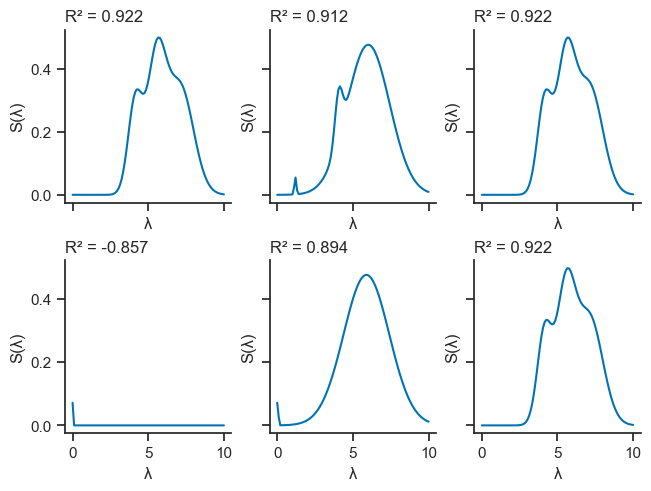

In [34]:
# Second experiment, we try different initial conditions:
# Here, we experiment with a few different values

initial_guesses = [
    [
        0.3,
        4.0,
        1.0,
        0.3,
        6.0,
        1.0,
        0.3,
        8.0,
        1.0,
    ],
    [
        0.3,
        4.0,
        1.0,
        0.3,
        3.0,
        1.0,
        0.3,
        2.0,
        1.0,
    ],
    [
        0.1,
        4.0,
        1.5,
        0.3,
        6.0,
        1.5,
        0.2,
        8.0,
        1.5,
    ],
    [
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
    ],
    [
        0.1,
        1.0,
        1.0,
        0.1,
        2.0,
        1.0,
        0.1,
        3.0,
        1.0,
    ],
    [
        0.8,
        5.0,
        0.25,
        1.6,
        5.0,
        0.25,
        1.9,
        5.0,
        0.25,
    ],
]

fig, axes = plt.subplots(
    constrained_layout=True, nrows=2, ncols=3, sharex=True, sharey=True
)
axes = axes.flatten()


for i, initial_guess in enumerate(initial_guesses):
    result = minimize(
        objective,
        initial_guess,
        args=(x, spectrum_with_noise[2]),
        bounds=bounds,
        options={
            "disp": False,
            "maxiter": 5000,
        },  # Print information, and do maximum 5000 iterations
    )
    fit_params = result.x
    tablei = make_table(result)
    display_html(tablei)
    y_fit = model(x, fit_params)
    mse = mean_squared_error(spectrum_with_noise[2], y_fit)
    r2 = r2_score(spectrum_with_noise[2], y_fit)
    axes[i].set(xlabel="λ", ylabel="S(λ)")
    axes[i].set_title(f"R² = {r2:.3f}", loc="left")
    axes[i].plot(x, y_fit)
sns.despine(fig=fig)

Inspecting the plots above, we see that the fitted parameters can vary significantly depending on the initial guess. The initial guess for the peak position seem to be important for the quality of the fitted curve.

#### Your answer to question 1.3(b): What values did you find for the parameters? Do you find your parameters to depend on the initial guess and the noise amplitude?

Please see the tables above for the parameter values. The obtained parameters are sensitive to both the initial guess and the noise amplitude. For instance, the peak position of the last peak varies from 5.934 to 9.945 when varying the initial conditions as in the code above.

However, we find that we can get reasonable results in many cases, both for high noise levels and for initial guesses that are somewhat far off. This suggests that while careful selection of initial guesses and noise reduction are important, the method exhibits some robustness to variations in these factors.

### 1.3(c)

Modify your code to use separable least squares (SLS). Investigate how the solution depends on your initial guess and the noise-level ($\gamma$)

In [42]:
# We modify our set-up so that we can find the beta parameters
# via least squares, and the other parameters via non-linear least squares:


def model_sls(x, betas, lambdas, sigmas):
    """Calculate y using the given parameters."""
    signal = np.zeros_like(x)
    for beta_i, lambda_i, sigma_i in zip(betas, lambdas, sigmas):
        signal += gaussian(x, beta_i, lambda_i, sigma_i)
    return signal


def calculate_beta(x, y, lambdas, sigmas):
    X = []
    for lambda_i, sigma_i in zip(lambdas, sigmas):
        X.append(gaussian(x, 1, lambda_i, sigma_i))
    X = np.array(X).T
    return np.linalg.lstsq(X, y, rcond=None)[0]


def sls_objective(nonlinear_params, x, y):
    lambdas = nonlinear_params[0:3]
    sigmas = nonlinear_params[3:]

    betas = calculate_beta(x, y, lambdas, sigmas)
    y_fit = model_sls(x, betas, lambdas, sigmas)
    return np.sum((y - y_fit) ** 2)

In [43]:
initial_guess_sls = [
    # Lambda:
    4.0,
    6.0,
    8.0,
    # Sigma:
    1.0,
    1.0,
    1.0,
]

# Set up boundaries for the coefficients, these
# are on form (min, max) for each parameter
bounds_sls = [
    (0.0, 10.0),
    (0.0, 10.0),
    (0.0, 10.0),
    (0.01, 2.0),
    (0.01, 2.0),
    (0.01, 2.0),
]

result = minimize(
    sls_objective,
    initial_guess_sls,
    args=(x, spectrum_with_noise[2]),
    bounds=bounds_sls,
    options={
        "disp": False,
        "maxiter": 5000,
    },
)

lambdas = result.x[0:3]
sigmas = result.x[3:]
betas = calculate_beta(x, spectrum_with_noise[2], lambdas, sigmas)


table_data = {
    "Peak 1": [round(i, ndigits=3) for i in [betas[0], lambdas[0], sigmas[0]]],
    "Peak 2": [round(i, ndigits=3) for i in [betas[1], lambdas[1], sigmas[1]]],
    "Peak 3": [round(i, ndigits=3) for i in [betas[2], lambdas[2], sigmas[2]]],
}
table = pd.DataFrame(
    table_data, index=[r"$\beta_i$", r"$\lambda_i$", r"$\sigma_i$"]
)
table

,Peak 1,Peak 2,Peak 3
$\beta_i$,0.294,0.415,0.344
$\lambda_i$,4.145,5.542,7.103
$\sigma_i$,0.479,0.614,0.879


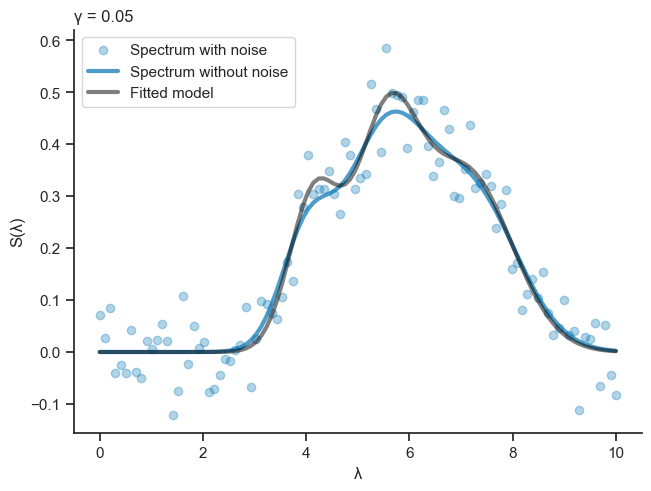

In [44]:
y_fit = model_sls(x, betas, lambdas, sigmas)

fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(x, spectrum_with_noise[2], label="Spectrum with noise", alpha=0.3)
ax.plot(
    x, spectrum_without_noise, label="Spectrum without noise", alpha=0.7, lw=3
)
ax.plot(x, y_fit, label="Fitted model", color="black", alpha=0.5, lw=3)
ax.set(xlabel="λ", ylabel="S(λ)")
ax.set_title(f"γ = {gamma}", loc="left")
ax.legend()
sns.despine(fig=fig)

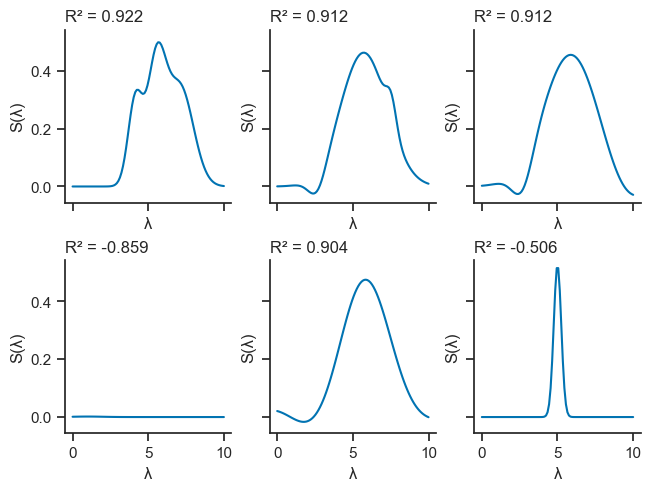

In [45]:
# Second experiment, we try different initial conditions:
# Here, we experiment with a few different values

initial_guesses_sls = [
    [
        4.0,
        6.0,
        8.0,
        1.0,
        1.0,
        1.0,
    ],
    [
        4.0,
        3.0,
        2.0,
        1.0,
        1.0,
        1.0,
    ],
    [
        4.0,
        6.0,
        8.0,
        1.5,
        1.5,
        1.5,
    ],
    [
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
    ],
    [
        1.0,
        2.0,
        3.0,
        0.25,
        1.0,
        1.5,
    ],
    [
        5.0,
        5.0,
        5.0,
        0.25,
        0.25,
        0.25,
    ],
]

fig, axes = plt.subplots(
    constrained_layout=True, nrows=2, ncols=3, sharex=True, sharey=True
)
axes = axes.flatten()


for i, initial_guess in enumerate(initial_guesses_sls):
    result = minimize(
        sls_objective,
        initial_guess,
        args=(x, spectrum_with_noise[2]),
        bounds=bounds_sls,
        options={
            "disp": False,
            "maxiter": 5000,
        },
    )

    lambdas = result.x[0:3]
    sigmas = result.x[3:]
    betas = calculate_beta(x, spectrum_with_noise[2], lambdas, sigmas)

    y_fit = model_sls(x, betas, lambdas, sigmas)
    mse = mean_squared_error(spectrum_with_noise[2], y_fit)
    r2 = r2_score(spectrum_with_noise[2], y_fit)
    axes[i].set(xlabel="λ", ylabel="S(λ)")
    axes[i].set_title(f"R² = {r2:.3f}", loc="left")
    axes[i].plot(x, y_fit)
sns.despine(fig=fig)

#### Your answer to question 1.3(c): What values did you find for the parameters? Do you find your parameters to depend on the initial guess and the noise amplitude? Are they different from the ones found in [1.3(b)](#1.3(b))?

The SLS method results in parameters that are similar to the ones found by non-linear least squares. For a noise level of 0.05 (and similar initial guesses), we get the same values:

|             |   Peak 1 |   Peak 2 |   Peak 3 |
|:------------|---------:|---------:|---------:|
| $\beta_i$   |    0.118 |    0.481 |    0.103 |
| $\lambda_i$ |    4.124 |    5.899 |    7.971 |
| $\sigma_i$  |    0.294 |    1.289 |    0.489 |


The parameters depend on both the initial guess and the noise amplitude (it is easier to fit to lower noise levels). Varying the initial guess indicates that SLS is not particularly more robust than non-linear least squares. Nevertheless, SLS successfully recovers reasonable parameter estimates in many scenarios, even with high noise or less accurate initial guesses.  Careful selection of initial guesses and noise reduction remain important factors to obtain accurate parameters.

### 1.3(d) (Optional)

Use bootstrapping (see page 54 in our textbook) with replacement to obtain error estimates for the Gaussian parameters.

In [47]:
initial_guess = [
    # Peak 1:
    0.3,
    4.0,
    1.0,
    # Peak 2
    0.3,
    6.0,
    1.0,
    # Peak 3
    0.3,
    8.0,
    1.0,
]

bounds = [
    (0.01, 2.0),
    (0.0, 10.0),
    (0.01, 2.0),
    (0.01, 2.0),
    (0.0, 10.0),
    (0.01, 2.0),
    (0.01, 2.0),
    (0.0, 10.0),
    (0.01, 2.0),
]

In [48]:
number_of_samples = 1000

parameters_bootstrap = []
for _ in range(number_of_samples): #no. of re
    idx = np.random.choice(len(x), size=len(x), replace=True)
    x_sample = x[idx]
    y_sample = spectrum_with_noise[2][idx]
    result = minimize(
        objective,
        initial_guess,
        args=(x_sample, y_sample),
        bounds=bounds,
        options={
            "disp": False,
            "maxiter": 5000,
        },  # Print information, and do maximum 5000 iterations
    )
    if result.success:
        parameters_bootstrap.append(result.x)

In [55]:
parameters_bootstrap = np.array(parameters_bootstrap)
for i in range(parameters_bootstrap.shape[1]):
    param = parameters_bootstrap[:, i]
    mean = np.mean(param)
    std = np.std(param)
    if i in [0, 3, 6]: print('\nPeak params')
    print(f"mean: {mean:.4g} \tstd: {std:.4g}")
    lower_bounds = np.percentile(param, 2.5)
    upper_bounds = np.percentile(param, 97.5)
    print(f"95% Confidence Intervals: {lower_bounds:.4g}, {upper_bounds:.4g}")


Peak params
mean: 0.2709 	std: 0.08874
95% Confidence Intervals: 0.1432, 0.3569
mean: 4.161 	std: 0.1594
95% Confidence Intervals: 3.966, 4.535
mean: 0.4421 	std: 0.1605
95% Confidence Intervals: 0.1355, 0.7499

Peak params
mean: 0.4129 	std: 0.09789
95% Confidence Intervals: 0.1989, 0.5111
mean: 5.629 	std: 0.2031
95% Confidence Intervals: 5.303, 5.951
mean: 0.7196 	std: 0.3068
95% Confidence Intervals: 0.2053, 1.319

Peak params
mean: 0.3066 	std: 0.1078
95% Confidence Intervals: 0.109, 0.4374
mean: 7.196 	std: 0.3404
95% Confidence Intervals: 6.42, 7.719
mean: 0.8159 	std: 0.224
95% Confidence Intervals: 0.2761, 1.253


#### Your answer to question 1.3(d): What are your error estimates?

Please see the numbers above.

## Your feedback for Exercise 1

We highly value your feedback as it will help us improve this exercise for future students (and also gauge the level for the following exercises). Please take a few minutes to answer the following questions:

1. Length and difficulty:
   - How long did it take you to complete this exercise?
   - On a scale of 1 to 5 (1=too short, 5=too long), how would you rate the length of the exercise?
   - What was the most challenging part of this exercise?
   - On a scale of 1 to 5 (1=too easy, 5=too difficult), how would you rate the difficulty of the exercise?
2. Example code:
   - Would you have preferred more or less example code?
   - Were there any parts of the exercise where you would have liked to see more code examples?
3. Errors and inconsistencies:
   - Did you encounter any errors or inconsistencies in the exercise instructions or data?
4. General feedback
   - How could this exercise be improved?
   - Do you have any other comments or suggestions?

# Appendix

## A. Least squares without the intercept
We are going to determine the parameter $b$ for the linear model,

\begin{equation}
y =  b x,
\end{equation}

and we do this by minimizing the sum of squared errors ($S$). With $n$
measurements of $y$ and $x$,

\begin{equation}
S = \sum_{i=1}^n (y_i - b x_i)^2 = \sum_{i=1}^n r_i^2
\end{equation}

To minimize $S$ we calculate the derivative:

\begin{equation*}
\frac{\partial S}{\partial b} = -2 \sum_{i=1}^n r_i x_i, \quad
\frac{\partial^2 S}{\partial b^2} = 2\sum_{i=1}^n x_i^2 \geq 0,
\end{equation*}

Note that the second derivative is positive, except for the
trivial case when $x_i = 0$, and we are indeed going to
find a minimum.
Requiring that $\frac{\partial S}{\partial b} = 0$ gives,

\begin{equation}
-2 \sum_{i=1}^n r_i x_i = 0 \implies \sum_{i=1}^n (y_i x_i - b x_i^2) = 0 \implies 
b = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2} .
\end{equation}

We can also repeat this derivation for weighted least squares. The sum of squared errors
is then,

\begin{equation}
S = \sum_{i=1}^n w_i (y_i - b x_i)^2,
\end{equation}

where $w_i$ are the weights and, after minimization,

\begin{equation}
b = \frac{\sum_{i=1}^n w_i y_i x_i}{\sum_{i=1}^n w_i x_i^2} .
\end{equation}

You can find more information on the weighted least squares method (with error analysis)
in Bevington and Robinson <a name="cite_ref-1"></a>[[1]](#bevington).
Taylor <a name="cite_ref-2"></a>[[2]](#taylor) states error formulas for
the parameters that might be useful for cases when
the error in $y$ is known and constant (e.g., as in "normal" least squares).


<a name="bevington"></a>[[1]](#cite_ref-1) Philip R. Bevington and D. Keith Robinson. Data reduction and error analysis for the physical sciences. 3rd ed. New York, NY: McGraw-Hill, 2003.

<a name="taylor"></a>[[2]](#cite_ref-2) John R. Taylor. An Introduction to Error Analysis: The Study of Uncertainties in Physical
    Measurements. 2nd ed. Sausalito, CA: University Science Books, 1997.

## B. The summary results from `statsmodels`

The summary method in `statsmodels` prints out a lot of information.
We have here fitted a model $y=a + bx$ to 10 $(x, y)$ points with `statsmodels`
and the resulting summary output is printed below. This output is described in the
sections below. 

```text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.00e-06
Time:                        08:42:06   Log-Likelihood:                -16.957
No. Observations:                  10   AIC:                             37.91
Df Residuals:                       8   BIC:                             38.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4248      0.931      4.754      0.001       2.278       6.571
x1             1.9235      0.145     13.253      0.000       1.589       2.258
==============================================================================
Omnibus:                        3.674   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                0.755
Skew:                           0.464   Prob(JB):                        0.686
Kurtosis:                       3.975   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

### B.1. Information about the model


- **Dep. Variable:** The dependent variable (the variable we are predicting, $y$) in the model.
- **Model:** The type of model we have created (OLS = Ordinary Least Squares).
- **Method:** We have used Least squares to find the parameters.
- **Date & Time:** The date and time for when we created the model.
- **No. Observations:** The number of observations in the data set (we had 10 ($x$,$y$) values here).

### B.2. Information about the calculation
- **Df Residuals:** Degrees of freedom for the residuals (sum of squares). 
  This is equal to $n - k - 1$ where $n$ is the number of observations and $k$ is
  the number of variables. In our case: $n - k - 1 = 10 - 1 - 1 = 8$. If we did the
  fitting without the constant term (for instance, by centring the data first), this
  number would be $n-k = 10-1=9$.
- **Df Model:** Degrees of freedom for the model (number of variables in the model).
- **Covariance type:** Calculations of standard errors assume homoscedastic errors.
  If this is not the case, then the standard error is not computed correctly. There
  are alternative ways of calculating the standard error; this field tells you
  if statsmodels used a more robust method.
  
### B.3. Information about the overall quality
- **R-squared:** Coefficient of determination ($R^2$) for the model.
- **Adj. R-squared:** The adjusted $R^2$ for the model. Useful from comparing
  models as this one will only increase (when adding more variables) if the
  increase in $R^2$ is more than one would expect by chance.
- **F-statistic:** This is the result of an F-test where the null hypothesis is that all
  regression coefficients are equal to zero! Effectively, this compares the model we
  have just made to an alternative model equal to the constant intercept term. 
  To use this value, we would have to decide on a $\alpha$ level and look up a critical F-value.
  This is some extra work for us, so we typically rather focus on the **Prob (F-statistic)**.
- **Prob (F-statistic):** This is the probability of getting an **F-statistic** at
  least as extreme as the one above if all regression coefficients are zero. 
  It is also known as the $p$-value.
  If we have selected $\alpha$ value, we will reject the null hypothesis if 
  the $p$-value is smaller than $\alpha$. Here, we have a very small $p$-value, and we reject the
  null hypothesis: We conclude that at least one regression parameter is
  significant for predicting $y$.
- **Log-Likelihood:** In least squares, we are minimizing the squared error.
  This is equivalent (if the errors are normally distributed)
  to maximizing the likelihood. The value printed here is the
  logarithm of the likelihood for the model.
- **AIC and BIC:** The
  [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) and
  [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion).
  These can be directly calculated from the Log-Likelihood and are useful for comparing alternative
  models. Generally, we prefer models with lower AIC and BIC.
  
### B.4. Information about the coefficients

- **coef:** The determined coefficients for the model.

- **std err:** The standard of the coefficients. This
  is calculated from,
  
  \begin{equation*}
  \text{Var}(\mathbf{b}) = s^2 \cdot \text{diag} \left(\mathbf{X}^\top \mathbf{X} \right)^{-1},
  \end{equation*}
  
  where,
  
  \begin{equation*}
  s^2 = \frac{SSE}{n - k - 1},
  \end{equation*}
  
  and $SSE$ is the sum of squared error/residuals, $n$ the number of data points (10 in this case)
  and $k$ the number of variables (1 in this case).

- **t, P>|t|, and [0.025 0.975]:** Some statistics for the
  coefficients. **t** is the $t$ statistic, which is obtained by dividing
  the coefficient by the standard error.
  This is the statistic in a test where the null hypothesis is that the coefficient is zero.
  To use the $t$ statistic we would have to consult a table with critical $t$-values for $n-k-1$
  degrees of freedom. The **P>|t|** is the $p$-value for such a $t$-test.
  Here, the $t$ statistic
  is high (and the p-value is low) and we would reject this null hypothesis for both the
  constant and x1. In other words, these coefficients are indeed different from
  zero.
  Finally, the **[0.025 0.975]**
  represents a $100(1-\alpha)\%$ confidence interval for the coefficients. We did not specify 
  $\alpha$ here, but we can give it as a parameter. The default is $\alpha=0.05$.